<a href="https://colab.research.google.com/github/davidklhui/stochastic-modelling/blob/main/Discussion_of_basic_3x3_Slot_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

author: David K.L. Hui

This project will demonstrate the design of a simple 3x3 slot game mechanism, simulation study, and further improvement.


<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=12lNtk-bNGoHVTt6DL-vyyCSjziOsdKYy' width='400'/>
<figcaption>Disclaimer: I do not own these images, I capture this from Google Images</figcaption></center>
</figure>




# Section 1: Introduction

## 1.1: Background

Basic 3x1 and 3x3 slot games are the most classical design within Casino and iGaming history. Due to their simplicity, we can perform several analysis and discuss their validity of payout allocation strategies.

To determine the payout for each matching, it is clear that it should depends upon the probability of the matching events. The higher the occurrence, the lower the payout.

In our previous project **Stochastic Simulations - Spin Poker**, we have an mathematically intensive approach to study the payout allocation. In this project, we will use a simpler method to study these game design.

## 1.2: Objective

Demostrate a basic 3x3 slot game design using simulations:
1. fixed payout and changing the probability of occurrence of each symbols for each reel
2. improve the game by adjusting the hit frequency

## 1.3: Definition

For a 3x3 slot game, there will be 3 reels with 3 rows in the window. Each reel will have a number of symbols.

In this project, will define the player will get payout only when, for each row, a certain combintaion of symbols matched.

## 1.4: Example

Suppose there are 3 reels with 3 rows. For each reel, there are 4 possible symbols: Apple, Lemon, Kiwi Fruit (Kiwi for short), and Cheese 🍎🍋🥝🧀.

For each payline, if it shows 3 identical fruits, 3 cheeses, or 3 different fruits, then the player will get corresponding payout.

Suppose matched the same fruits will get 10 payout; 3 cheeses will get 15 payout; different fruits will get 5 payout:

No matching: get 0 <br/>
(for row 2, because cheese is not categorized as cheese, so would not count as matched different fruits)
<table>
    <tr>
      <td bgcolor='#444444'>🍋</td><td bgcolor='#444444'>🍋</td><td bgcolor='#444444'>🧀</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>🧀</td><td bgcolor='#444444'>🍎</td><td bgcolor='#444444'>🥝</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>🍎</td><td bgcolor='#444444'>🍎</td><td bgcolor='#444444'>🥝</td>
    </tr>
</table>

<br/>

Row 1 matched: 3 🍋: get 10
<table>
    <tr>
      <td bgcolor='#888888'>🍋</td><td bgcolor='#888888'>🍋</td><td bgcolor='#888888'>🍋</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>🧀</td><td bgcolor='#444444'>🍎</td><td bgcolor='#444444'>🥝</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>🍎</td><td bgcolor='#444444'>🍎</td><td bgcolor='#444444'>🥝</td>
    </tr>
</table>

<br/>


Row 1 matched: 3 🍋, Row 3 matched: 3 🧀 -> get 10 + 15 = 25
<table>
    <tr>
      <td bgcolor='#888888'>🍋</td><td bgcolor='#888888'>🍋</td><td bgcolor='#888888'>🍋</td>
    </tr>
    <tr>
      <td bgcolor='#444444'>🧀</td><td bgcolor='#444444'>🍎</td><td bgcolor='#444444'>🥝</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🧀</td><td bgcolor='#888888'>🧀</td><td bgcolor='#888888'>🧀</td>
    </tr>
</table>

<br/>

Row 1 matched: 3 🍋, Row 2 matched: 3 🍎, Row 3 matched: different fruits -> get 10 + 10 + 5 = 25
<table>
    <tr>
      <td bgcolor='#888888'>🍋</td><td bgcolor='#888888'>🍋</td><td bgcolor='#888888'>🍋</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🍎</td>
    </tr>
    <tr>
      <td bgcolor='#888888'>🍎</td><td bgcolor='#888888'>🥝</td><td bgcolor='#888888'>🍋</td>
    </tr>
</table>

<br/>


emojis are copied from [emojipedia](https://emojipedia.org/about)




# Section 2: Understanding the problem

In this section, we will define all functions, classes, objects for simulation study. Although it is simple to calculate the probability of occurrence by high school maths, we will still use simulation for convenience and easy-to-change in later configurations

In [ ]:
# import related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from collections import Counter


## 2.1 Class Design

In [ ]:
# define Symbol class, allow to not supplying probability, default to 0
class Symbol():
  def __init__(self, key, symbol, prob=0):
    if(prob < 0 or prob > 1):
      raise Exception(f"probability must be within [0,1], received {symbol} has prob={prob}")

    self.key = key
    self.symbol = symbol
    self.prob = prob


  def __repr__(self):
    return self.symbol




cheese = Symbol(0, '🧀')
apple = Symbol(1, '🍎')
lemon = Symbol(2, '🍋')
kiwi = Symbol(3, '🥝')


cheese, apple, lemon, kiwi

(🧀, 🍎, 🍋, 🥝)

In [ ]:
# define a reel, which can provide the probability of apple, lemon, and kiwi
# so for the 3-reels slot design, we can have different set of probabilities of symbols
class Reel():
  def __init__(self, apple_prob, lemon_prob, kiwi_prob):
    self.apple = Symbol(1, '🍎', apple_prob)
    self.lemon = Symbol(2, '🍋', lemon_prob)
    self.kiwi = Symbol(3, '🥝', kiwi_prob)
    self.cheese = Symbol(0, '🧀', 1 - apple_prob - lemon_prob - kiwi_prob)

  def symbols(self):
    return [self.apple, self.lemon, self.kiwi, self.cheese]

  def probs(self):
    return [x.prob for x in self.symbols()]

  def spin(self, size):
    return np.random.choice(a=self.symbols(), size=size, p=self.probs(), replace=True)


# randomly set the probabilities, they are not important in this stage, but we will adjust them later
reel1 = Reel(0.1, 0.2, 0.3)

# take a look at the spin result, it will be a array of length 3
reel1.spin(size=3)

array([🥝, 🍋, 🍋], dtype=object)

In [ ]:
# similarly, set the prob of symbols occurrence for reel 2 and 3
# again, these values are not important in this stage, we will update it later
reel2 = Reel(0.2, 0.3, 0.4)
reel3 = Reel(0.4, 0.4, 0.15)


In [ ]:
# define the slot game which aceept 3 reels
# for later usage, this can be extended to higher numbers, depending on the need
# also, the spin accept size parameter, which is also changable to 5 for example, depending on the design
class Slot():
  def __init__(self, reel1, reel2, reel3):
    self.reels = [reel1, reel2, reel3]

  def spin(self, size=3):
    reel1_outcome = self.reels[0].spin(size)
    reel2_outcome = self.reels[1].spin(size)
    reel3_outcome = self.reels[2].spin(size)

    return np.c_[reel1_outcome, reel2_outcome, reel3_outcome]


slot = Slot(reel1, reel2, reel3)

# for easier checking, set the spin size be 4, so we should expect there are 4 rows x 3 columns (3 reels)
slot.spin(4)

array([[🥝, 🥝, 🥝],
       [🧀, 🍋, 🍋],
       [🍋, 🍎, 🍎],
       [🥝, 🍋, 🍋]], dtype=object)

In [ ]:
# next, define how to calculate the payout
# to be more variant, lets define having 5 different patterns
payout_distinct_fruits = 5
payout_all_apple = 10
payout_all_lemon = 10
payout_all_kiwi = 20
payout_all_cheese = 50


def payout(symbol1, symbol2, symbol3):
  keys = symbol1.key, symbol2.key, symbol3.key

  key_counts = Counter(keys)

  # check if distinct fruits
  if(sorted(keys) == [1,2,3]):
    return payout_distinct_fruits

  # check if same keys, if so, check if the first key is 0 (cheese) or > 0 (fruit)
  elif(sorted(list(key_counts.values())) == [3]):
    match(keys[0]):
      case 0:
        return payout_all_cheese
      case 1:
        return payout_all_apple
      case 2:
        return payout_all_lemon
      case 3:
        return payout_all_kiwi
      case _: # should not happen
        return 0

  # else nothing
  else:
    return 0

In [ ]:
# with positive payout

print(f"same fruit (apple): {payout(apple, apple, apple)}")

print(f"same fruit (lemon): {payout(lemon, lemon, lemon)}")

print(f"same fruit (kiwi): {payout(kiwi, kiwi, kiwi)}")

print(f"same cheese: {payout(cheese, cheese, cheese)}")

print(f"distinct fruits: {payout(kiwi, lemon, apple)}")



same fruit (apple): 10
same fruit (lemon): 10
same fruit (kiwi): 20
same cheese: 50
distinct fruits: 5


In [ ]:
# no payout
print(f"no payout (kiwi, apple, kiwi): {payout(kiwi, apple, kiwi)}")
print(f"no payout (cheese, apple, kiwi): {payout(cheese, apple, kiwi)}")


no payout (kiwi, apple, kiwi): 0
no payout (cheese, apple, kiwi): 0


In [ ]:
# take a look how to get the payout of a spin
# just for verifying the payout calculation example, suppose the window has 10 rows
outcome = slot.spin(10)
print(outcome)

payouts = [payout(payline[0], payline[1], payline[2]) for payline in outcome]

print(payouts)

[[🍋 🧀 🍎]
 [🧀 🥝 🍋]
 [🥝 🥝 🥝]
 [🧀 🍋 🍋]
 [🍋 🍎 🧀]
 [🍋 🍎 🍎]
 [🍋 🥝 🥝]
 [🧀 🍎 🍎]
 [🧀 🥝 🍋]
 [🍎 🍋 🍎]]
[0, 0, 20, 0, 0, 0, 0, 0, 0, 0]


## 2.2: Simulations

After we defined all these objects, we can then perform our simulations:

STEP1: define a required size of outcome N <br/>
STEP2: for each iteration <br/>
$\quad\quad$STEP2.1: get a spin result <br/>
$\quad\quad$STEP2.2: calculate the payout for each payline<br/>
$\quad\quad$STEP2.3: count the occurrence<br/>
STEP3: report the occurrence of each event that induced payout


In [ ]:
sim_size = 1000
def simulation(sim_size):
  outcome_df = pd.DataFrame(columns=["payline1", "payline2", "payline3"])
  for i in range(sim_size):
    spin_outcome = slot.spin()
    outcome_df.loc[i] = [payout(payline[0], payline[1], payline[2]) for payline in spin_outcome]
  return outcome_df


In [ ]:
outcome_df = simulation(sim_size)

In [ ]:
# the distribution for all paylines should be similar because of its independence
outcome_df['payline1'].value_counts(), outcome_df['payline2'].value_counts(), outcome_df['payline3'].value_counts()

(payline1
 0     845
 5      96
 10     44
 20     14
 50      1
 Name: count, dtype: int64,
 payline2
 0     838
 5     122
 10     26
 20      9
 50      5
 Name: count, dtype: int64,
 payline3
 0     840
 5     124
 10     23
 20     11
 50      2
 Name: count, dtype: int64)

In [ ]:
out1 = outcome_df['payline1'].value_counts()
out2 = outcome_df['payline2'].value_counts()
out3 = outcome_df['payline3'].value_counts()

# using Series.add, with fill_value=0 to prevent missing index for some Series
outcome_count_combined = out1.add(out2, fill_value=0).add(out3, fill_value=0)
outcome_count_combined.rename_axis('payout', inplace=True)

outcome = pd.DataFrame(outcome_count_combined)
outcome = outcome.reset_index()
outcome['prob'] = outcome['count'] / outcome_count_combined.sum()
outcome['expectation'] = outcome['prob'] * outcome['payout']


# although it doesn't make any sense, we will adjust the probability later
outcome

,payout,count,prob,expectation
0,0,2523,0.841000,0.000000
1,5,342,0.114000,0.570000
2,10,93,0.031000,0.310000
3,20,34,0.011333,0.226667
4,50,8,0.002667,0.133333


In [ ]:
# the expected payout for each horizontal payline, and so we can get the expected payout for each spin

expected_payout_payline = outcome['expectation'].sum()
expected_payout = expected_payout_payline * 3


expected_payout_payline, expected_payout

(1.2400000000000002, 3.7200000000000006)

## 2.3: Metrics to evaluate the performance of the game: RTP, and Expected gain


### 2.3.1: RTP (Return to Player)


Using the definition of
RTP = $\frac{win}{bet} \times 100\%$, where win is the expected payout, and bet is the cost. According to the result of the referenced articule, we should keep the RTP between 95% to 97% for better game experience.

Suppose now the cost be 10, and from the above study the expected payout is 8.545, so the RTP is

In [ ]:
RTP = expected_payout / 10 * 100
RTP

37.2

using the definition, we can see that 85% RTP should have bad player experience

### 2.3.2: Expected gain

Expected gain, which is simply using the definition expectation of basic probability and statistics. My previous project is using expected gain to control the optimization problem. It is obvious that RTP and expected gain are closely related

\begin{align}
E(gain) &= E(payout) - cost \\
        &= win - bet \\
        &= bet \times (\frac{win}{bet} - 1) \\
        &= bet \times (\frac{win}{bet} - 1) \times \text{100%} \\
        &= bet \times \text{RTP}
\end{align}


So all algorithm and methodologies used in the previous project are clearly valid.

In the consequence sections, we will use RTP for discussion

# Section 3: Problem Formulation

In this section, we will discuss how to adjust the configurations to achieve good player experience using RTP by fixed payout and adjust the probability of symbols in each reel

## 3.1: Formulation

Suppose our slot game configuration:
1. cost (bet) = 10
2. payout_distinct_fruits = 5
3. payout_all_apple = 10
4. payout_all_lemon = 10
5. payout_all_kiwi = 20
6. payout_all_cheese = 50
7. payline is for each row (horizontal line only, not concerning diagonal)


Recall that, each reel $i=1,2,3$ has 4 possible symbols with 4 corresponding probabilities:

$$
\sum_{j=1}^4 p_{i,j} = 1
$$

So, we will have 3 * (4-1) = 9 adjustable parameters.

For each reel, we can use deterministic method to divide the domain [0,1]x[0,1]x[0,1] into equal width and loop over them. But this will induce 2 major problems:
1. inefficient because we need to perform this operation over 3 reels. If we need to take a step size h, then we need to calculate $(\frac{1}{h})^{(3x3)}$ times.
2. we need to keep the sum of probability of each reel to be 1

One elegant method is to use simulation. In probability theory, we can use one famous distribution called Dirichlet distribution.

Dirichlet distribution is a well known multivariate distribution that can generate values of different length, keeping their sum up to 1. Dirichlet distribution is also known as multivariate Beta distribution, where (univaraite) Beta distribution is well known as its capability of simulating probbility because of its support [0,1]

Although the clear drawback of this method is we needs to simulate large number of outcomes in order to get global optimal, this is still much better than dividing the domain in deterministic method


For more detail, please see https://en.wikipedia.org/wiki/Dirichlet_distribution


In [ ]:
# for example, using the same parameters
x = np.random.dirichlet(np.ones(4))

print(x)
print(sum(x))

[0.01641778 0.69204742 0.08869232 0.20284248]
1.0


In [ ]:
y = np.random.dirichlet(alpha=np.ones(4), size=3)

print(y)

y.sum(axis=1)

[[0.38275336 0.24288801 0.31254305 0.06181557]
 [0.12823094 0.27735764 0.03347142 0.56093999]
 [0.35343137 0.22196243 0.14929556 0.27531065]]


array([1., 1., 1.])

## 3.2: Programming

Here we will use some codes from above


In [ ]:

class SlotSim():

  def __init__(self, sim_size, sim_size_for_probs, cost):
    self.sim_size = sim_size
    self.sim_size_for_probs = sim_size_for_probs
    self.cost = cost
    self.results = [None] * sim_size

    self.sim()

  def sim(self):
    for i in range(self.sim_size):
      print(i)
      ssi = self.SlotSimInternal(self.sim_size_for_probs, self.cost)

      self.results[i] = ssi




  class SlotSimInternal():
    def __init__(self, sim_size_for_probs, cost):
      dirichlet = np.random.dirichlet(np.ones(4), size=3)
      slot = Slot(reel1=Reel(dirichlet[0][0], dirichlet[0][1], dirichlet[0][2]),
                    reel2=Reel(dirichlet[1][0], dirichlet[1][1], dirichlet[1][2]),
                    reel3=Reel(dirichlet[2][0], dirichlet[2][1], dirichlet[2][2]))

      self.sim_size = sim_size
      self.sim_size_for_probs = sim_size_for_probs
      self.cost = cost
      self.slot = slot
      self.outcome = None

      self.train()
      self.RTP = self.calculate_RTP()


    def train(self):
      outcome_df = pd.DataFrame(columns=["payline1", "payline2", "payline3"])
      for i in range(self.sim_size_for_probs):
        spin_outcome = self.slot.spin()
        outcome_df.loc[i] = [payout(payline[0], payline[1], payline[2]) for payline in spin_outcome]

      out1 = outcome_df['payline1'].value_counts()
      out2 = outcome_df['payline2'].value_counts()
      out3 = outcome_df['payline3'].value_counts()

      outcome_count_combined = out1.add(out2, fill_value=0).add(out3, fill_value=0)
      outcome_count_combined.rename_axis('payout', inplace=True)

      outcome = pd.DataFrame(outcome_count_combined)
      outcome = outcome.reset_index()
      outcome['prob'] = outcome['count'] / outcome_count_combined.sum()
      outcome['expectation'] = outcome['prob'] * outcome['payout']

      self.outcome = outcome

    def calculate_RTP(self):
      expected_payout_payline = self.outcome['expectation'].sum()
      expected_payout = expected_payout_payline * 3
      self.expected_payout = expected_payout
      self.expected_gain = expected_payout - self.cost
      return expected_payout / 10 * 100


In [ ]:
x = SlotSim(200, 10000, 10)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [ ]:
# save the data for later session to use

import pickle


with open('x.pkl', 'wb') as file:
    pickle.dump(x, file)

In [ ]:
# load the data in case the session restarted, also required to re-execute classes/functions from above

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open(r"x.pkl", "rb") as input_file:
  x = pickle.load(input_file)

## 3.3: Simulation Result

In [ ]:
for i in range(200):
  rtp = x.results[i].RTP
  if rtp > 90 and rtp < 100:
    print(f"i={i}, RTP={rtp}")

i=41, RTP=91.86500000000001
i=61, RTP=90.40000000000002
i=135, RTP=95.87500000000003
i=139, RTP=99.25


out of 200 results, we find that i=135 seemed to have the best RTP

In [ ]:
config_best = x.results[135]

In [ ]:
config_best.outcome

,payout,count,prob,expectation
0,0,23663,0.788767,0.000000
1,20,3276,0.109200,2.184000
2,5,2699,0.089967,0.449833
3,50,331,0.011033,0.551667
4,10,31,0.001033,0.010333


## 3.4: Review the found best result

Here we can take a look at the configurations of the probability of symbols in each reel.

In [ ]:
config_best.slot.reels[0].probs()

[0.34594267138267626,
 0.038801163966465935,
 0.3442856509471367,
 0.27097051370372105]

In [ ]:
config_best.slot.reels[1].probs()

[0.07749528339597762,
 0.046118732699572465,
 0.7218062452766421,
 0.15457973862780783]

In [ ]:
config_best.slot.reels[2].probs()

[0.004292094980778626,
 0.2932050035279458,
 0.4468769628241586,
 0.25562593866711697]

In [ ]:
config_best.slot.spin()

array([[🍎, 🥝, 🧀],
       [🥝, 🥝, 🥝],
       [🥝, 🥝, 🥝]], dtype=object)

In [ ]:
ttl = 0
N=100000
for i in range(N):
  xx = config_best.slot.spin()
  yy = [payout(payline[0], payline[1], payline[2]) for payline in xx]

  ttl = ttl + sum(yy)
#  print(f"result: {yy}, payout: {sum(yy)}")

print(f"average payout = {ttl / N}, RTP = {ttl/N / 10 * 100}%")

average payout = 9.54245, RTP = 95.4245%


Take a look at the distribution of payout

In [ ]:
the_list = [0]*N

for i in range(N):
  xx = config_best.slot.spin()
  yy = [payout(payline[0], payline[1], payline[2]) for payline in xx]
  the_list[i] = sum(yy)
#  print(f"result: {yy}, payout: {sum(yy)}")


print(f"{Counter(the_list)}")

Counter({0: 49023, 20: 20714, 5: 16583, 25: 4673, 40: 2933, 10: 2022, 50: 1995, 70: 556, 55: 462, 30: 327, 45: 299, 60: 159, 15: 105, 75: 62, 90: 43, 100: 31, 35: 5, 120: 5, 105: 2, 65: 1})


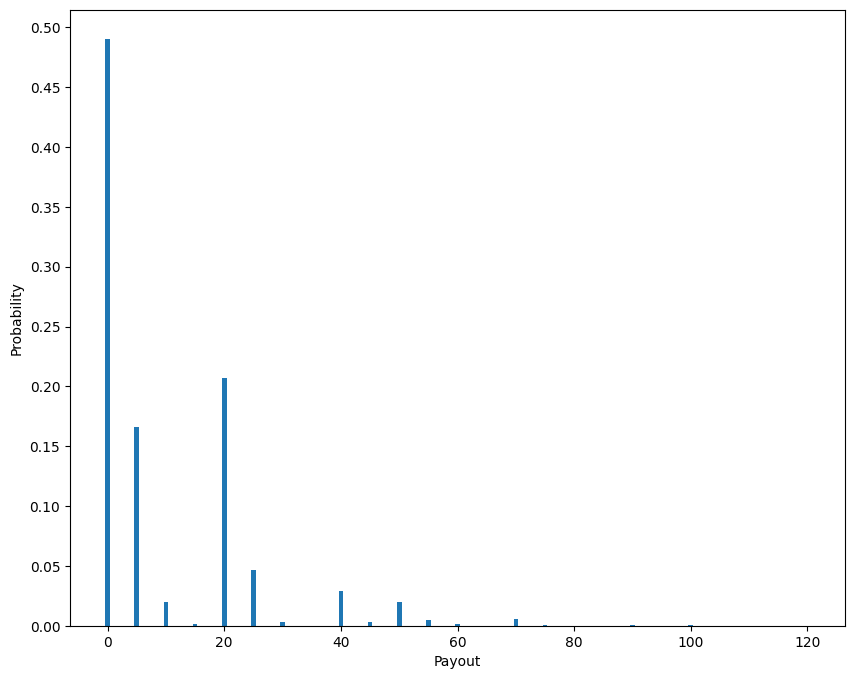

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(list(Counter(the_list).keys()), list(map(lambda x: x/N, list(Counter(the_list).values()))))
plt.xlabel("Payout")
plt.ylabel("Probability")
plt.yticks(np.arange(0, max(list(map(lambda x: x/N, list(Counter(the_list).values()))))+0.05, 0.05))
plt.show()

Here we can see that the payout and probability is not inversely proportional. Here it is indeed penalizing low probability event (distinct fruits payout=5) but increase the occurrence of specific high payout event (all kiwi, payout=20)

# Section 4: Further Improvement

Instead of just referring to the RTP, we can also make use of the concept of **Hit Frequency** and **Volatility** to make the game more appealing.


## 4.1: Hit frequency

Hit frequency, for short, is the ratio (or percentage) of wins. This metric does not take the amount of payout into account. But the value of hit frequency can highly affect the gaming experience. For example, a high hit frequency means the player we get payout very often; lower value means the player we rarely get payout.

So the adjustment of hit frequency can lead to a different experience.


### 4.1.1 Hit frequency of section 3.4 result

Out of 100000 spins, 48690 times have no payout, and so 51310 wins.

So the hit frequency will then be 51.31%

## 4.2: Hit frequency with RTP

It will be a complicated task to solely adjust one only because they are inter-related. However, as we performed before, we can run simulation to see what configuration can lead to a good RTP with target hit frequency level

In [ ]:
### Update the previous code, and also report the hit frequency

class SlotSim2():

  def __init__(self, sim_size, sim_size_for_probs, cost):
    self.sim_size = sim_size
    self.sim_size_for_probs = sim_size_for_probs
    self.cost = cost
    self.results = [None] * sim_size

    self.sim()

  def sim(self):
    for i in range(self.sim_size):
      print(i)
      ssi = self.SlotSimInternal(self.sim_size_for_probs, self.cost)

      self.results[i] = ssi




  class SlotSimInternal():
    def __init__(self, sim_size_for_probs, cost):
      dirichlet = np.random.dirichlet(np.ones(4), size=3)
      slot = Slot(reel1=Reel(dirichlet[0][0], dirichlet[0][1], dirichlet[0][2]),
                    reel2=Reel(dirichlet[1][0], dirichlet[1][1], dirichlet[1][2]),
                    reel3=Reel(dirichlet[2][0], dirichlet[2][1], dirichlet[2][2]))

      self.sim_size = sim_size
      self.sim_size_for_probs = sim_size_for_probs
      self.cost = cost
      self.slot = slot
      self.outcome = None

      self.train()
      self.RTP = self.calculate_RTP()
      self.hit_frequency = self.calculate_hit_freq()

    def train(self):
      outcome_df = pd.DataFrame(columns=["payline1", "payline2", "payline3"])
      for i in range(self.sim_size_for_probs):
        spin_outcome = self.slot.spin()
        outcome_df.loc[i] = [payout(payline[0], payline[1], payline[2]) for payline in spin_outcome]

      out1 = outcome_df['payline1'].value_counts()
      out2 = outcome_df['payline2'].value_counts()
      out3 = outcome_df['payline3'].value_counts()

      outcome_count_combined = out1.add(out2, fill_value=0).add(out3, fill_value=0)
      outcome_count_combined.rename_axis('payout', inplace=True)

      outcome = pd.DataFrame(outcome_count_combined)
      outcome = outcome.reset_index()
      outcome['prob'] = outcome['count'] / outcome_count_combined.sum()
      outcome['expectation'] = outcome['prob'] * outcome['payout']

      self.outcome = outcome

    def calculate_RTP(self):
      expected_payout_payline = self.outcome['expectation'].sum()
      expected_payout = expected_payout_payline * 3
      self.expected_payout = expected_payout
      self.expected_gain = expected_payout - self.cost
      return expected_payout / 10 * 100

    def calculate_hit_freq(self):
      ou = self.outcome
      return (1-(ou[ou['payout']==0]['prob'])**3).to_list()[0]



In [ ]:
x2 = SlotSim2(1000, 10000, 10)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
# save the data for later session to use

import pickle


with open('x2.pkl', 'wb') as file:
    pickle.dump(x2, file)

In [ ]:
# load the data in case the session restarted, also required to re-execute classes/functions from above

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open(r"x2.pkl", "rb") as input_file:
  x2 = pickle.load(input_file)

In [ ]:
x2_df = pd.DataFrame(columns=['i', 'RTP', 'HF'])
for i in range(1000):
  rtp = x2.results[i].RTP
  hf = x2.results[i].hit_frequency
  x2_df.loc[i] = [i, rtp, hf*100]
#  print(f"i={i}, RTP={rtp}, fit_freq={hf}")
x2_df = x2_df.astype({'i': int})


In [ ]:
x2_df

,i,RTP,HF
0,0,43.745,38.796787
1,1,69.150,65.905389
2,2,59.995,62.311143
3,3,33.500,32.816224
4,4,51.470,52.172708
...,...,...,...
995,995,52.250,51.255660
996,996,25.500,25.089190
997,997,60.215,62.018198
998,998,37.615,43.977657


In [ ]:
# because there are only a few solutions for RTP within [95,97], so I widen it a bit
v1 = 94
v2 = 98
h1 = 25
h2 = 35

cond = (x2_df['RTP']>=v1) & (x2_df['RTP'] <= v2) & (x2_df['HF']>=h1) & (x2_df['HF'] <= h2)


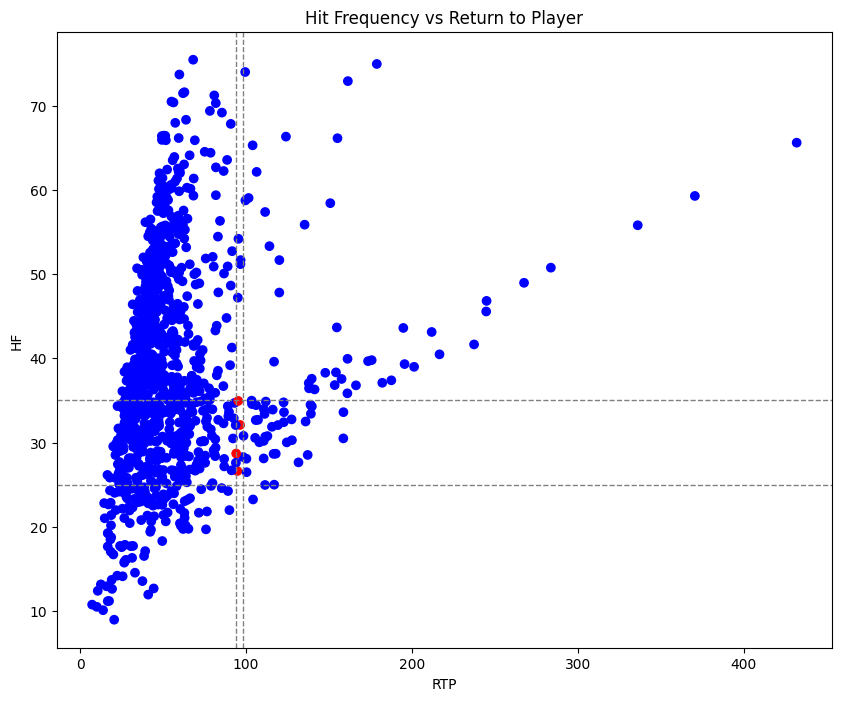

In [ ]:

plt.figure(figsize=(10,8))

plt.scatter(x2_df['RTP'], x2_df['HF'], c=np.where(cond, 'red', 'blue'), marker='o')
plt.xlabel('RTP')
plt.ylabel('HF')


plt.axvline(x=v1, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=v2, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=h1, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=h2, color='gray', linestyle='--', linewidth=1)

plt.title("Hit Frequency vs Return to Player")

plt.show()

From the diagram above, we can see the overall scatter plots of the HF vs RTP relationship. And that there are 2 feasible solutions within the region.

In [ ]:
x2_df[cond]

,i,RTP,HF
59,59,94.805,26.612919
268,268,96.430,32.084856
806,806,94.080,28.692068
881,881,95.295,34.941252


The closest one is at index 268, which has RTP around 96% (within 95-97%), and Hit Frequency is 32% (within 25-35%); the second best one is at index 881

## 4.3: Review the found results

### 4.3.1 The best one

In [ ]:
config_best2 = x2.results[268]

In [ ]:
for symbol in config_best2.slot.reels[0].symbols():
  print(f"symbol: {symbol.symbol}, prob: {symbol.prob}")

symbol: 🍎, prob: 0.5716886038851716
symbol: 🍋, prob: 0.07899500597081525
symbol: 🥝, prob: 0.011728507081821816
symbol: 🧀, prob: 0.3375878830621913


In [ ]:
for symbol in config_best2.slot.reels[1].symbols():
  print(f"symbol: {symbol.symbol}, prob: {symbol.prob}")

symbol: 🍎, prob: 0.12947798071243422
symbol: 🍋, prob: 0.386755987664342
symbol: 🥝, prob: 0.15842776776521103
symbol: 🧀, prob: 0.3253382638580128


In [ ]:
for symbol in config_best2.slot.reels[2].symbols():
  print(f"symbol: {symbol.symbol}, prob: {symbol.prob}")

symbol: 🍎, prob: 0.16223514799726915
symbol: 🍋, prob: 0.298742917056726
symbol: 🥝, prob: 0.046861021864737916
symbol: 🧀, prob: 0.4921609130812669


Recall the payouts are given when:

payout_distinct_fruits = 5 <br/>
payout_all_apple = 10 <br/>
payout_all_lemon = 10 <br/>
payout_all_kiwi = 20 <br/>
payout_all_cheese = 50


average payout = 9.5008, RTP = 95.00800000000001%, HF = 31.230999999999998%
Counter({0: 68993, 50: 12853, 5: 9582, 10: 5308, 55: 1094, 100: 775, 60: 650, 15: 470, 20: 158, 105: 43, 65: 26, 110: 19, 150: 13, 70: 10, 25: 5, 30: 1})


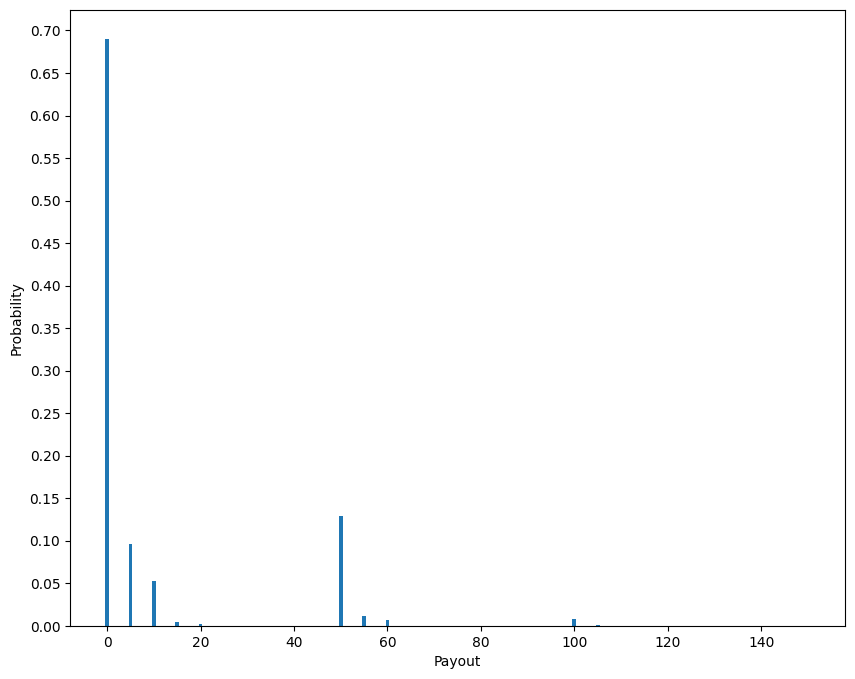

In [ ]:
ttl2 = 0
win2 = 0
N=100000
for i in range(N):
  xx = config_best2.slot.spin()
  yy = [payout(payline[0], payline[1], payline[2]) for payline in xx]

  ttl2 = ttl2 + sum(yy)
  if sum(yy) > 0:
    win2 = win2 + 1
#  print(f"result: {yy}, payout: {sum(yy)}")

print(f"average payout = {ttl2 / N}, RTP = {ttl2/N / 10 * 100}%, HF = {win2/N * 100}%")


the_list2 = [0]*N

for i in range(N):
  xx = config_best2.slot.spin()
  yy = [payout(payline[0], payline[1], payline[2]) for payline in xx]
  the_list2[i] = sum(yy)
#  print(f"result: {yy}, payout: {sum(yy)}")


print(f"{Counter(the_list2)}")


plt.figure(figsize=(10,8))
plt.bar(list(Counter(the_list2).keys()), list(map(lambda x: x/N, list(Counter(the_list2).values()))))
plt.xlabel("Payout")
plt.ylabel("Probability")
plt.yticks(np.arange(0, max(list(map(lambda x: x/N, list(Counter(the_list2).values()))))+0.05, 0.05))
plt.show()

### 4.3.2: The second best result

In [ ]:
config_best3 = x2.results[881]

for symbol in config_best3.slot.reels[0].symbols():
  print(f"symbol: {symbol.symbol}, prob: {symbol.prob}")


print("")

for symbol in config_best3.slot.reels[1].symbols():
  print(f"symbol: {symbol.symbol}, prob: {symbol.prob}")

print("")

for symbol in config_best3.slot.reels[2].symbols():
  print(f"symbol: {symbol.symbol}, prob: {symbol.prob}")

symbol: 🍎, prob: 0.10092344746584057
symbol: 🍋, prob: 0.033823774631102685
symbol: 🥝, prob: 0.4961994501851736
symbol: 🧀, prob: 0.3690533277178832

symbol: 🍎, prob: 0.16730274790515037
symbol: 🍋, prob: 0.16891674856707337
symbol: 🥝, prob: 0.2567975547148424
symbol: 🧀, prob: 0.4069829488129339

symbol: 🍎, prob: 0.31215011855202246
symbol: 🍋, prob: 0.101362073130488
symbol: 🥝, prob: 0.3028641971992304
symbol: 🧀, prob: 0.2836236111182592


average payout = 9.56825, RTP = 95.6825%, HF = 34.946%
Counter({0: 65098, 5: 10556, 50: 9553, 20: 8578, 10: 1894, 55: 1020, 70: 901, 25: 884, 100: 490, 40: 358, 60: 168, 30: 167, 15: 148, 75: 43, 105: 40, 45: 29, 120: 25, 90: 16, 110: 9, 65: 9, 150: 6, 35: 6, 80: 2})


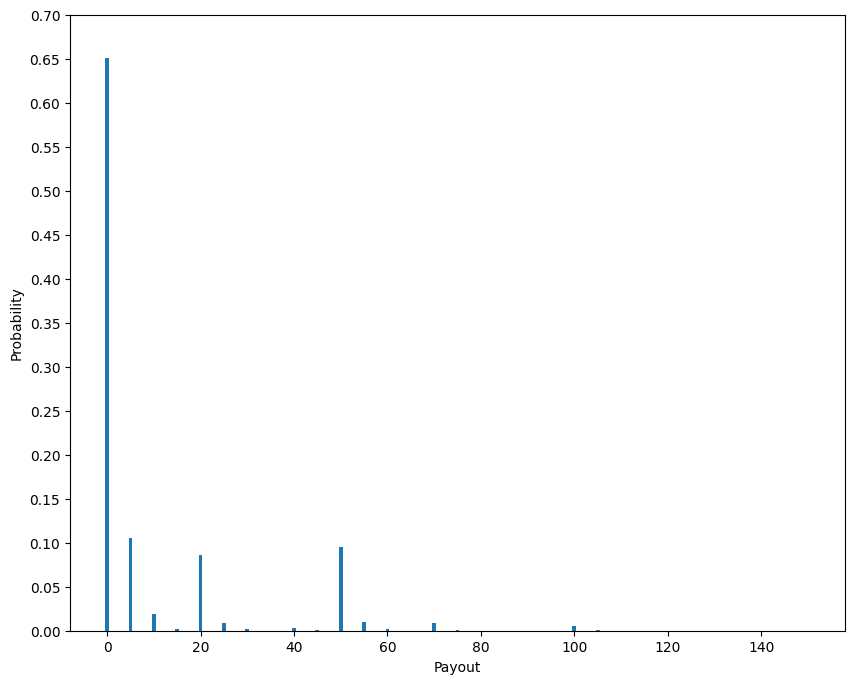

In [ ]:
ttl3 = 0
win3 = 0
N=100000
for i in range(N):
  xx = config_best3.slot.spin()
  yy = [payout(payline[0], payline[1], payline[2]) for payline in xx]

  ttl3 = ttl3 + sum(yy)
  if sum(yy) > 0:
    win3 = win3 + 1
#  print(f"result: {yy}, payout: {sum(yy)}")

print(f"average payout = {ttl3 / N}, RTP = {ttl3/N / 10 * 100}%, HF = {win3/N * 100}%")


the_list3 = [0]*N

for i in range(N):
  xx = config_best3.slot.spin()
  yy = [payout(payline[0], payline[1], payline[2]) for payline in xx]
  the_list3[i] = sum(yy)
#  print(f"result: {yy}, payout: {sum(yy)}")


print(f"{Counter(the_list3)}")


plt.figure(figsize=(10,8))
plt.bar(list(Counter(the_list3).keys()), list(map(lambda x: x/N, list(Counter(the_list3).values()))))
plt.xlabel("Payout")
plt.ylabel("Probability")
plt.yticks(np.arange(0, max(list(map(lambda x: x/N, list(Counter(the_list3).values()))))+0.05, 0.05))
plt.show()

# Section 5: Conclusion

In this project we have discussed the basic 3x3 slot design with horizontal paylines. Under fixed payout, we can use Dirichlet Distribution to simulate the possible distribution of symbols for each reel. Then use RTP and hit frequency to discuss the way of tuning for good gaming experience

# Appendix

## A: Mathematical formulation

Suppose there are 3 reels, each has 4 symbols, and window size is 3x3.

Probability of getting symbol j at reel i = $p_{i,j}$
so,
$$
\sum_{j=1}^4 p_{i,j} = 1
$$


Payout for each payline:
1. same symbol 1 -> $r_1$
2. same symbol 2 -> $r_2$
3. same symbol 3 -> $r_3$
4. same symbol 4 -> $r_4$
5. distinct symbols {1,2,3} without order -> $r_5$

Hence, the expected payout for any payline, $E(Payout)$ is

\begin{align}
& p_{1,1}p_{2,1}p_{3,1}r_1 + p_{1,2}p_{2,2}p_{3,2}r_2 + p_{1,3}p_{2,3}p_{3,3}r_3 + p_{1,4}p_{2,4}p_{3,4}r_4 \\
&\quad + r_5 \times (p_{1,1}p_{2,2}p_{3,3} + p_{1,1}p_{2,2}p_{3,4} + ... + p_{1,2}p_{2,3}p_{3,4}) \ \ \ \text{there are 4C3 * 3! = 24 permutations)} \\
&= \sum_{i=1}^3p_{i,1}r_1 + \sum_{i=1}^3p_{i,2}r_2 +  \sum_{i=1}^3p_{i,3}r_3 + \sum_{i=1}^3p_{i,4}r_4 + \sum_{j,k,s=1\\distinct}^4\sum_{i=1}^3 p_{i,j}p_{i,k}p_{i,s}r_5
\end{align}

## B: Further Readings

Further readings:


[1] https://www.linkedin.com/pulse/slot-math-3-1-ace-cao/

[2] https://www.linkedin.com/pulse/slot-math-3-3-ace-cao/

[3] https://www.jeffbet.com/casino-guides/hit-frequency-slots/